In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("bank.csv", delimiter=";")

# Drop irrelevant columns
data = data.drop(["duration"], axis=1)

# Replace unknown values with NaN
data = data.replace("unknown", np.nan)
print(data.tail())
# Convert categorical variables to numerical
data["job"] = data["job"].astype("category").cat.codes
data["marital"] = data["marital"].astype("category").cat.codes
data["education"] = data["education"].astype("category").cat.codes
data["default"] = data["default"].astype("category").cat.codes
data["housing"] = data["housing"].astype("category").cat.codes
data["loan"] = data["loan"].astype("category").cat.codes
data["contact"] = data["contact"].astype("category").cat.codes
data["month"] = data["month"].astype("category").cat.codes
data["poutcome"] = data["poutcome"].astype("category").cat.codes
data["y"] = data["y"].astype("category").cat.codes

# Impute missing values with column means
data = data.fillna(data.mean())

# Split into features and target
x = data.drop(["y"], axis=1)
y = data["y"]

      age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul         5     -1         0      NaN  no  
4517       NaN    9   may         1     -1         0      NaN  no  
4518  cellular   19   aug        11     -1         0      NaN  no  
4519  cellular    6   feb         4    211         3    other  no  
4520  cellular    3   apr         2    249         7    other  no  


In [3]:
# summary of data
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.310330,1.147755,1.065915,0.016810,1422.657819,0.566025,0.152842,-0.226277,15.915284,5.540146,2.793630,39.766645,0.542579,-0.718868,0.115240
std,10.576211,3.235848,0.599650,0.780906,0.128575,3009.638142,0.495676,0.359875,0.555248,8.247667,3.002763,3.109807,100.121124,1.693562,0.678637,0.319347
min,19.000000,-1.000000,0.000000,-1.000000,0.000000,-3313.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,-1.000000,9.000000,3.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,-1.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,0.000000,21.000000,8.000000,3.000000,-1.000000,0.000000,-1.000000,0.000000
max,87.000000,10.000000,2.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,1.000000,31.000000,11.000000,50.000000,871.000000,25.000000,2.000000,1.000000


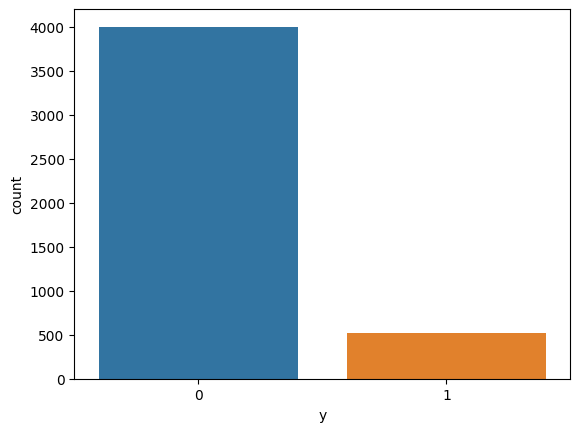

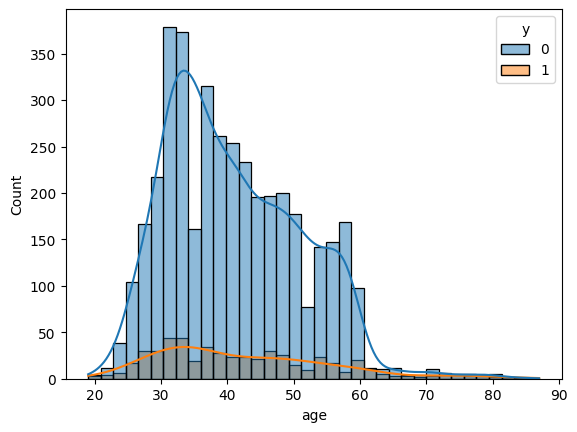

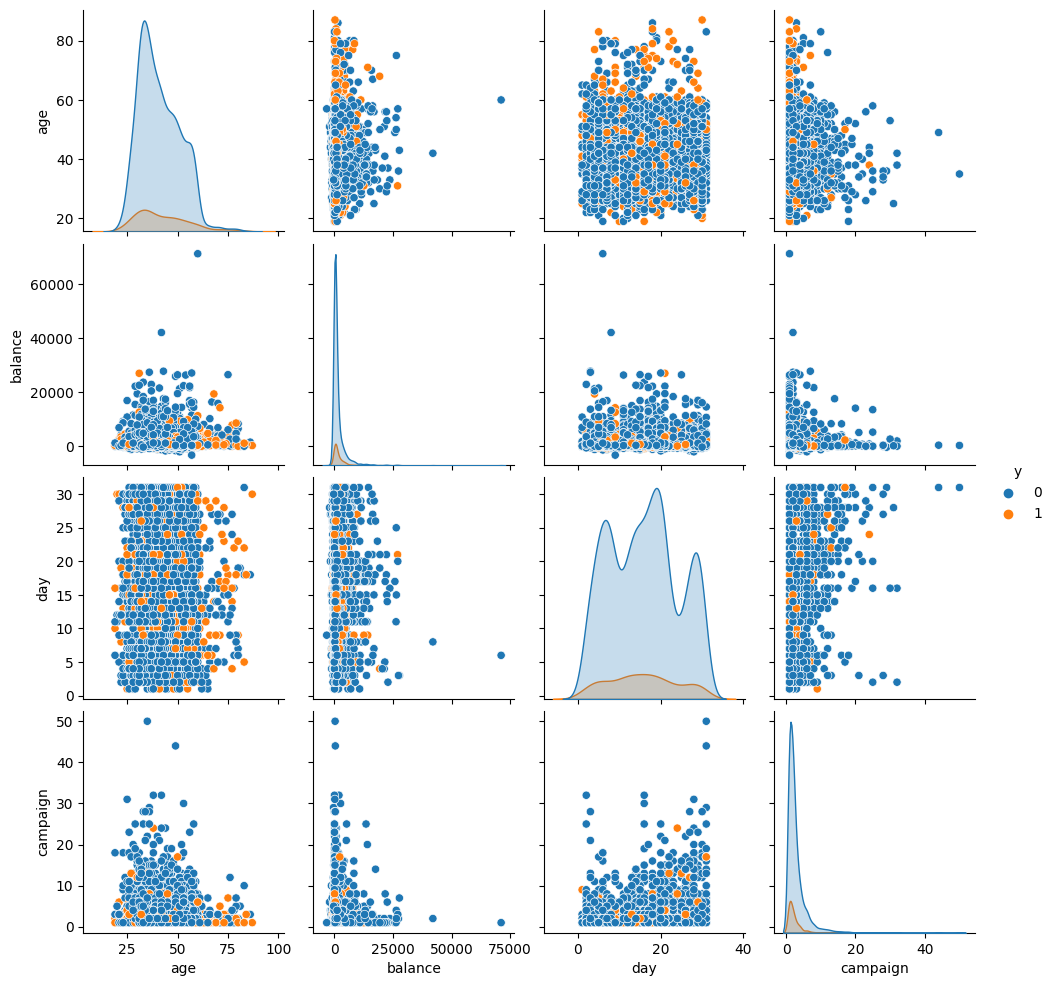

In [4]:
# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data)
plt.show()

sns.histplot(data=data, x="age", hue="y", kde=True)
plt.show()

sns.pairplot(data, vars=["age", "balance", "day", "campaign"], hue="y")
plt.show()


In [5]:
#Value Counts of Categorical Variables
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

for var in cat_vars:
    print(data[var].value_counts())

 4     969
 1     946
 9     768
 0     478
 7     417
 5     230
 6     183
 2     168
 10    128
 3     112
 8      84
-1      38
Name: job, dtype: int64
1    2797
2    1196
0     528
Name: marital, dtype: int64
 1    2306
 2    1350
 0     678
-1     187
Name: education, dtype: int64
0    4445
1      76
Name: default, dtype: int64
1    2559
0    1962
Name: housing, dtype: int64
0    3830
1     691
Name: loan, dtype: int64
 0    2896
-1    1324
 1     301
Name: contact, dtype: int64
8     1398
5      706
1      633
6      531
9      389
0      293
3      222
4      148
10      80
11      52
7       49
2       20
Name: month, dtype: int64
-1    3705
 0     490
 1     197
 2     129
Name: poutcome, dtype: int64


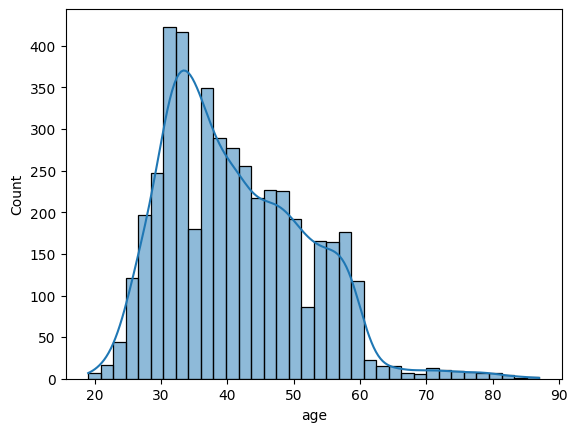

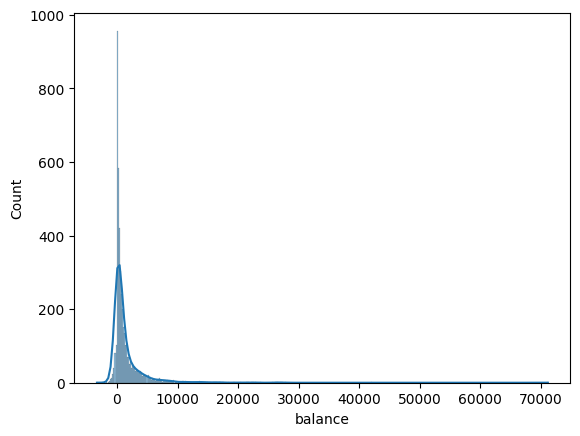

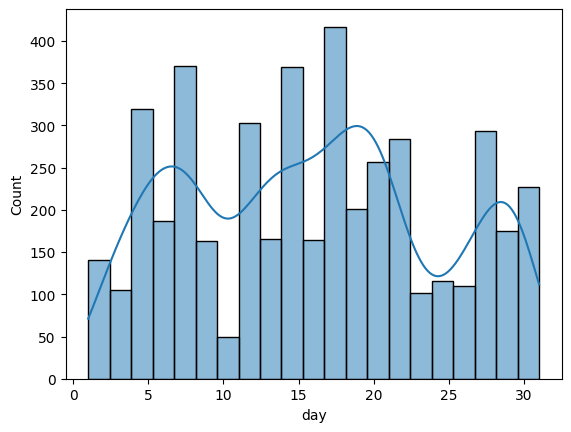

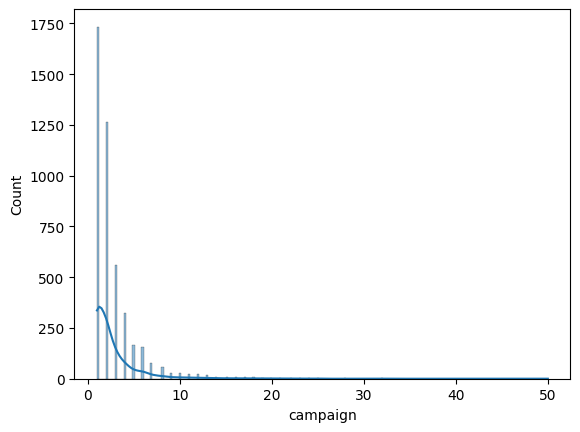

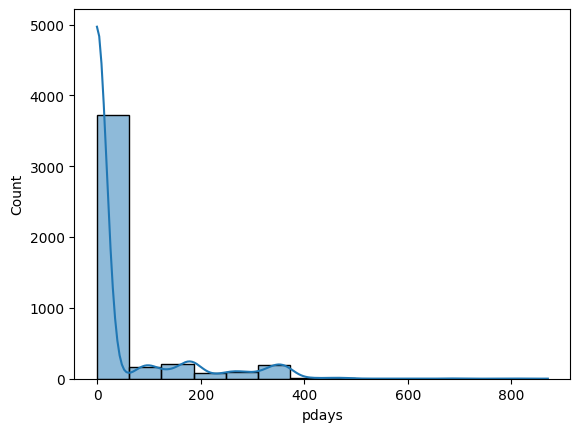

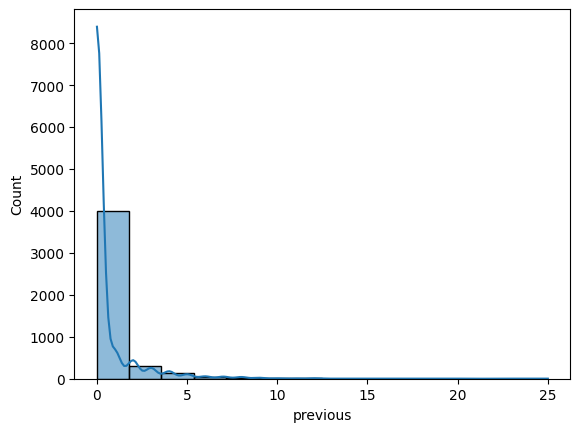

In [6]:
#Distribution of Numeric Variables
numeric_vars = ["age", "balance", "day", "campaign", "pdays", "previous"]

for var in numeric_vars:
    sns.histplot(data[var], kde=True)
    plt.show()


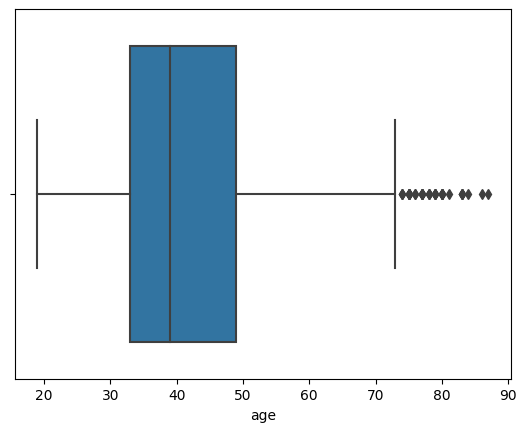

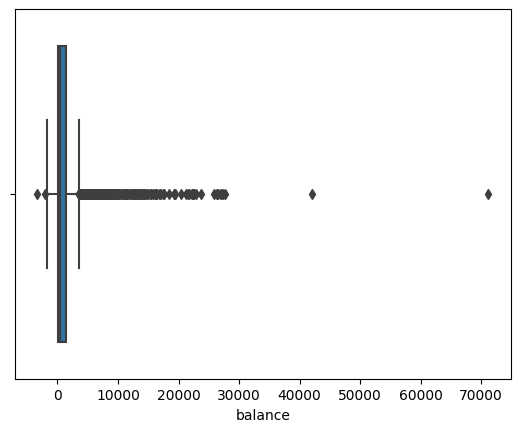

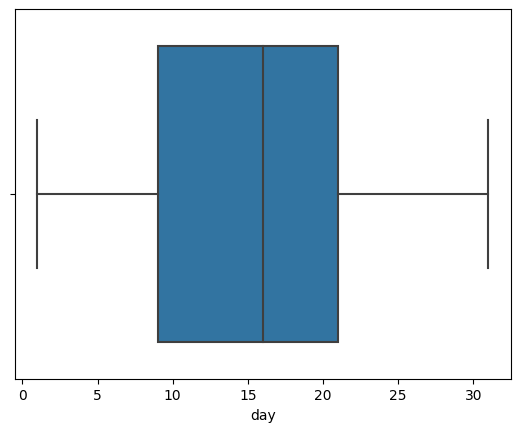

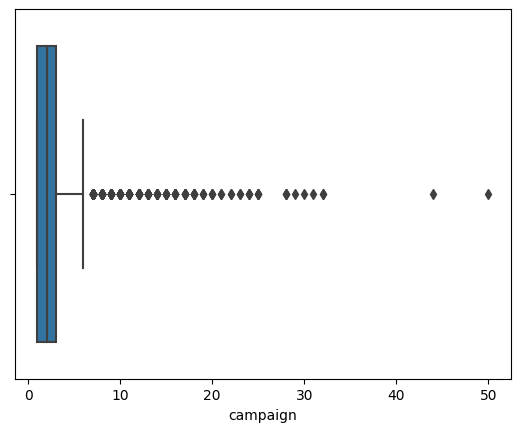

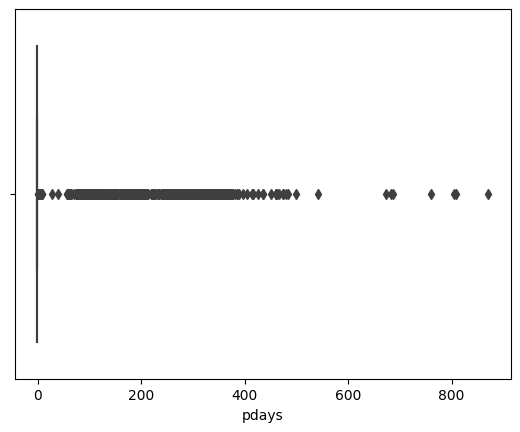

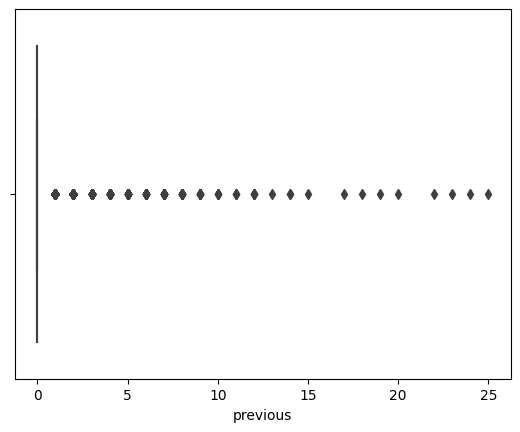

In [7]:
#Outlier Detection
for var in numeric_vars:
    sns.boxplot(x=data[var])
    plt.show()

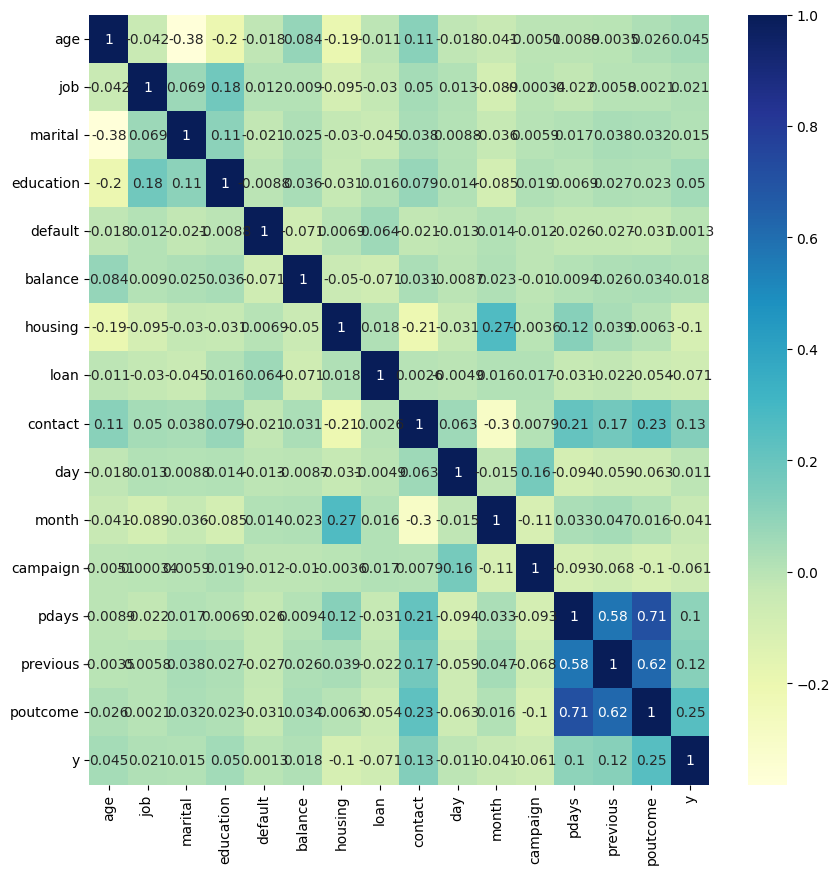

In [8]:
# feature selection, heatmap 
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)
plt.show()


Feature: age, Score: 0.15777
Feature: job, Score: 0.07496
Feature: marital, Score: 0.03643
Feature: education, Score: 0.04416
Feature: default, Score: 0.00483
Feature: balance, Score: 0.17928
Feature: housing, Score: 0.02147
Feature: loan, Score: 0.01260
Feature: contact, Score: 0.02511
Feature: day, Score: 0.13500
Feature: month, Score: 0.09278
Feature: campaign, Score: 0.06632
Feature: pdays, Score: 0.05688
Feature: previous, Score: 0.02952
Feature: poutcome, Score: 0.06288


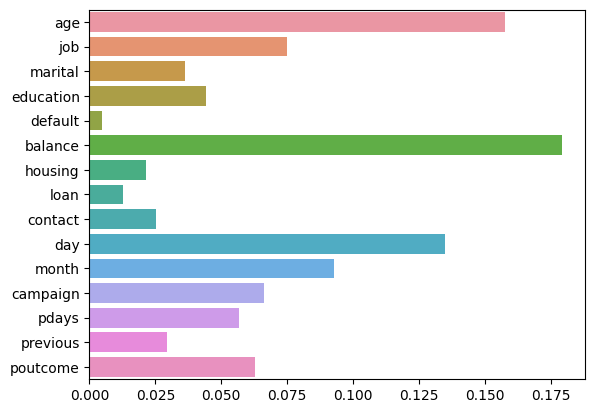

In [9]:
# feature importance visuallization
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)

importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x.columns[i],v))
    
sns.barplot(x=importance, y=x.columns)
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier




class Models():

        def get_random_forest_model(self):
          return RandomForestClassifier(n_estimators=100, random_state=2)

        def get_svm_model(self):
          return SVC(kernel='linear', C=0.1, random_state=2)

        def get_xgboost_model(self):
          return XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=2)

        def get_decision_tree_model(self):
          return DecisionTreeClassifier(random_state=2)

In [11]:
# split data and normalizing them
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
scaler = StandardScaler()

# fit scaler on x_train
scaler.fit(x_train)

# transform x_train and x_test using scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = Models()

# Create a list of models to evaluate
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Evaluate each model using cross-validation
for model in model_list:
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print("Model:", type(model).__name__)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)


Model: RandomForestClassifier
CV Scores: [0.88674033 0.8824343  0.8824343  0.88520055 0.89073306]
Mean CV Score: 0.8855085088986192
Model: SVC
CV Scores: [0.88121547 0.88105118 0.88105118 0.88105118 0.88105118]
Mean CV Score: 0.8810840344482397
Model: XGBClassifier
CV Scores: [0.89502762 0.88520055 0.87136929 0.88658368 0.8879668 ]
Mean CV Score: 0.8852295912519199
Model: DecisionTreeClassifier
CV Scores: [0.81906077 0.802213   0.78976487 0.81327801 0.80497925]
Mean CV Score: 0.805859180975524
Model: RandomForestClassifier
Accuracy: 0.8994475138121547
Precision: 0.5
Recall: 0.15384615384615385
F1 Score: 0.23529411764705882


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Accuracy: 0.8994475138121547
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Model: XGBClassifier
Accuracy: 0.907182320441989
Precision: 0.5897435897435898
Recall: 0.25274725274725274
F1 Score: 0.35384615384615387
Model: DecisionTreeClassifier
Accuracy: 0.8132596685082873
Precision: 0.2
Recall: 0.2857142857142857
F1 Score: 0.23529411764705882
Best Model: XGBClassifier
Best F1 Score: 0.35384615384615387


In [13]:
# hyper parameter engineering
from sklearn.model_selection import GridSearchCV

models = Models()

# Define parameter grid for each model
rf_param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]}
svm_param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
xgb_param_grid = {"learning_rate": [0.1, 0.2, 0.3], "max_depth": [5, 10, 15], "n_estimators": [50, 100, 200]}
dt_param_grid = {"max_depth": [5, 10, 15]}

# Create a list of parameter grids for each model
param_grid_list = [rf_param_grid, svm_param_grid, xgb_param_grid, dt_param_grid]

# Create a list of models to tune
model_list = [models.get_random_forest_model(), models.get_svm_model(), models.get_xgboost_model(), models.get_decision_tree_model()]

# Perform grid search for each model
best_models = []
for i in range(len(model_list)):
    grid_search = GridSearchCV(estimator=model_list[i], param_grid=param_grid_list[i], cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print("Model:", type(best_model).__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)

# Select the best model based on evaluation metrics on test set
best_model = None
best_score = 0

for model in best_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Update best model
    if f1 > best_score:
        best_model = model
        best_score = f1

print("Best Model:", type(best_model).__name__)
print("Best F1 Score:", best_score)


Model: RandomForestClassifier
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best CV Score: 0.8877203640448409
Model: SVC
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best CV Score: 0.8871674957780273
Model: XGBClassifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV Score: 0.8852295912519199
Model: DecisionTreeClassifier
Best Parameters: {'max_depth': 5}
Best CV Score: 0.8841250009551974
Model: RandomForestClassifier
Accuracy: 0.9027624309392265
Precision: 0.5555555555555556
Recall: 0.16483516483516483
F1 Score: 0.25423728813559326
Model: SVC
Accuracy: 0.9038674033149171
Precision: 0.6111111111111112
Recall: 0.12087912087912088
F1 Score: 0.20183486238532108
Model: XGBClassifier
Accuracy: 0.907182320441989
Precision: 0.5897435897435898
Recall: 0.25274725274725274
F1 Score: 0.35384615384615387
Model: DecisionTreeClassifier
Accuracy: 0.8994475138121547
Precision: 0.5
Recall: 0.10989010989010989
F1 Score: 0.18018018018018017
Best Model: XGBCla